# Logistic Regression for xor 

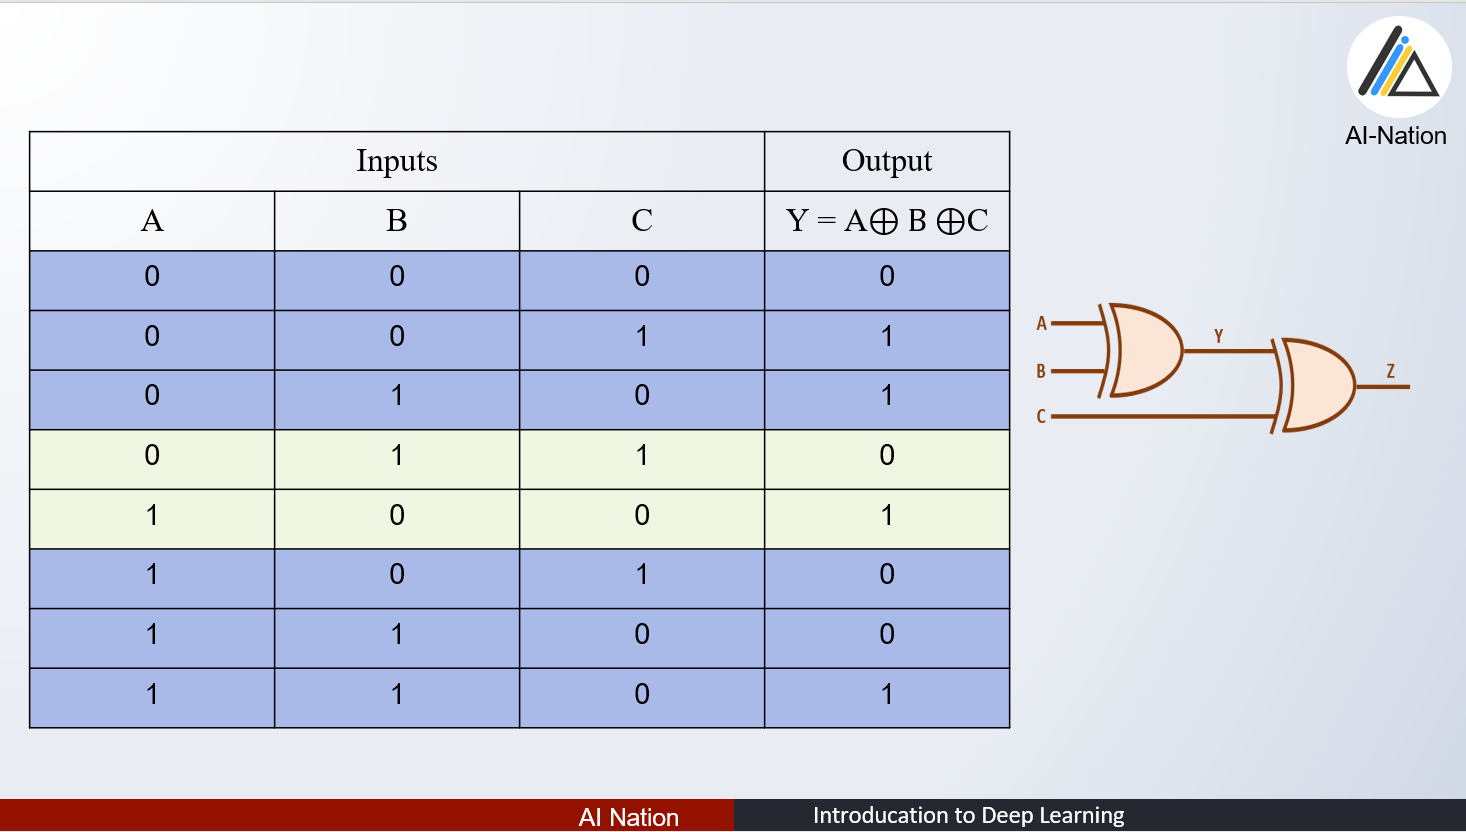

## 1. import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 2. Create inputs and outputs samples

In [2]:
inputs = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
    
])

outputs = np.array([[0],[1],[1],[0],[0],[1]])
print("X shape : ",inputs.shape)
print("Y shape : ",outputs.shape)


X shape :  (6, 3)
Y shape :  (6, 1)


## 3. Create perceptron

In [3]:
class Perceptron:
    
    def __init__(self,inputs,outputs):
        self.inputs = inputs
        self.outputs = outputs
        
        #initialize weights in random
        self.weights = np.array([[0.7],[0.2],[0.3]])
        
        self.error_history  = []
        self.epoch_list = []
        
        
    def sigmoid(self,z,derive = False):
        if derive == True:
            return z *(1-z)  # da/dz  = ⅆ𝜎(𝑧)/ⅆ𝑧
        
        return 1/(1 + np.exp(-z))
    
    
    
    # Calculate a = g(XW)
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs,self.weights))  
        
    
    def backpropagation(self):
        self.error = self.outputs - self.hidden  # simple dz = (a - y)    
        
        #S1 = np.multiply(self.outputs, np.log(self.hidden))
        #S2 = np.multiply(1.0-self.outputs, np.log(1.0 - self.hidden))
        #self.error = -(S1+S2)
        
        dW = 0.001 *  self.error  # dW = learning_rate * dz
        self.weights += np.dot(self.inputs.T,dW)  # W = W + (X*dW)
        
       
    
    def train(self,epochs = 30000):
        for epoch in range(epochs):
            
            #flow forward and produce an output
            self.feed_forward()
            
            self.backpropagation()
            
            #keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            
            self.epoch_list.append(epoch)
            
        
    def predict(self,new_input):
        prediction = self.sigmoid(np.dot(new_input,self.weights))
        if prediction > 0.5:
            return 0
        else:
            return 1

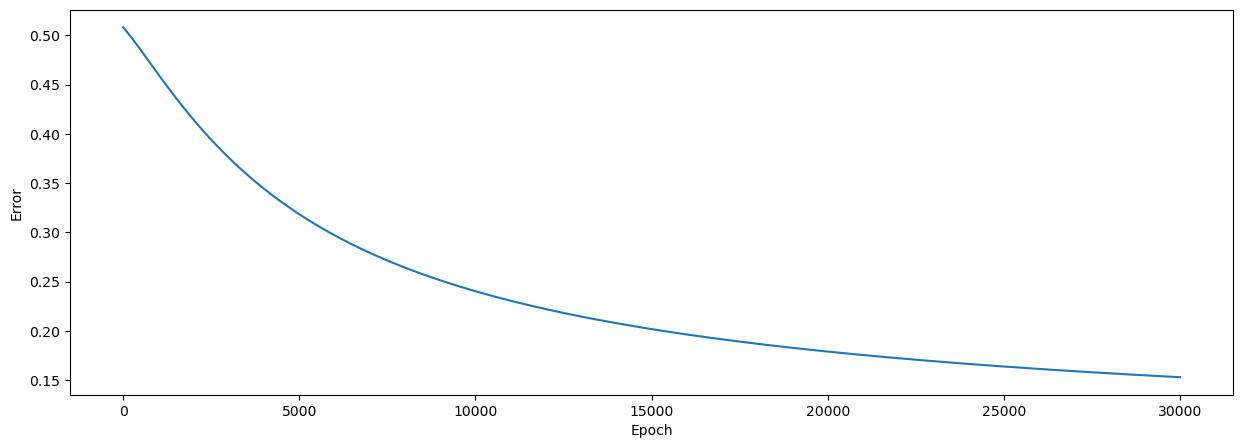

In [4]:
p = Perceptron(inputs,outputs)
p.train()

plt.figure(figsize = (15,5))
plt.plot(p.epoch_list, p.error_history)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()



In [5]:
eg1 = np.array([[0,1,1]])
prediction = p.predict(eg1)
print("Actual Label : 0",end='\t')
print("Predicted : ",prediction)


Actual Label : 0	Predicted :  0


In [6]:
eg2 = np.array([[1,0,0]])
prediction = p.predict(eg2)
print("Actual Label : 1",end='\t')
print("Predicted : ",prediction)

Actual Label : 1	Predicted :  1
